In [4]:
import networkx
import math
import numpy
import sys
import matplotlib.pyplot as plt
from IPython.display import Image

from lib.io import *
from lib.vis import *
from lib.datasets import *

In [5]:
#Reading graph. You should give a speed file as a parameter as well
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")

#Reading all values
FT = read_all_values(small_traffic["path"] + "traffic", small_traffic["num_snaps"], G) 

In [4]:
#values matrix dimensions
FT.shape 

(8640, 100)

In [5]:
#number of vertices
G.number_of_nodes()

100

In [6]:
#number of edges
G.number_of_edges()

128

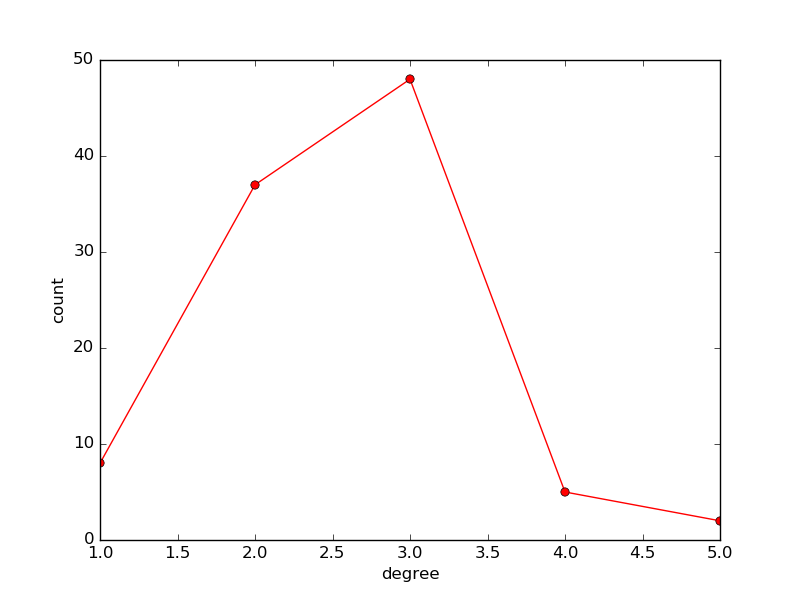

In [26]:
#degree distribution
degrees = networkx.degree(G)
values = sorted(set(degrees.values()))
hist = [list(degrees.values()).count(x) for x in values]

plt.figure()
plt.plot(values,hist,'ro-')
plt.xlabel('degree')
plt.ylabel('count')
plt.savefig('traffic_degree_distribution.png')

Image(filename="traffic_degree_distribution.png")

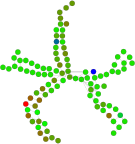

In [28]:
#visualizing a snapshot
set_f(G, FT[0])
draw_graph_with_values(G, "traffic.dot")

!sfdp -Goverlap=prism -Tsvg traffic.dot > traffic.svg

from IPython.display import SVG
SVG(filename='traffic.svg')

In [9]:
#comparing weekday and weekend speeds at 5pm
weekdays = [0,1,2,3,4] #weekday
weekend = [5,6] #weekend
hours = [17]

weekday_values = []
weekend_values = []
for t in range(small_traffic["num_snaps"]):
    if check_time_range_traffic(t, weekdays, hours):
        weekday_values.append(numpy.mean(FT[t]))
    else:
        weekend_values.append(numpy.mean(FT[t]))    

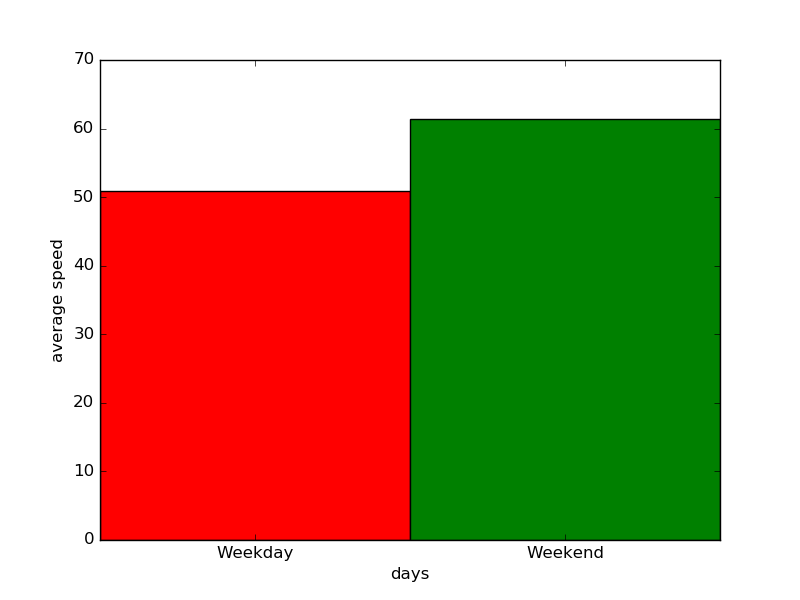

In [14]:
plt.figure()
plt.bar([1], [numpy.mean(weekday_values)], 1., color='r')
plt.bar([2], [numpy.mean(weekend_values)], 1., color='g')

plt.xticks([1.5, 2.5], ('Weekday', 'Weekend'))
plt.xlabel('days')
plt.ylabel('average speed')
plt.savefig('average_speed_weekday_weekend_5pm.png')

Image(filename="average_speed_weekday_weekend_5pm.png")